In [55]:
import matplotlib.pyplot as plt
import numpy as np
import h5py
import pandas as pd
import pylab as pl
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import silhouette_score

In [113]:
df = pd.read_excel("ESC-50-HumanClassification.xls") 
df.head()

,filename,fold,target,category,esc10,src_file,take
0,1-100032-A-0.wav,1,0,dog,True,100032,A
1,1-100038-A-14.wav,1,14,chirping_birds,False,100038,A
2,1-100210-A-36.wav,1,36,vacuum_cleaner,False,100210,A
3,1-100210-B-36.wav,1,36,vacuum_cleaner,False,100210,B
4,1-101296-A-19.wav,1,19,thunderstorm,False,101296,A


In [57]:
df['filename'] = df['filename'].str.replace('.wav', '.hdf5') 

df.to_csv('/Users/rezanaderi/Desktop/ML/Project/save/new_file.csv', index = False)   # Save new csv file

df = pd.read_csv("/Users/rezanaderi/Desktop/ML/Project/save/new_file.csv") 

/var/folders/tt/fbw2j40j3f34wgnqzyn6nfj80000gn/T/ipykernel_3758/2571277806.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['filename'] = df['filename'].str.replace('.wav', '.hdf5')


In [60]:
categories = ['breathing','coughing','footsteps','laughing','sneezing','snoring','toilet_flush','vacuum_cleaner','washing_machine',]

sort_file_name = {}

# find classes in categories
for category in categories:
    filenames = df.loc[df['category'].isin([category]), 'filename'].values.tolist()
    sort_file_name[category] = filenames

In [61]:
sort_file_name = pd.DataFrame(sort_file_name)
sort_file_name

,breathing,coughing,footsteps,laughing,sneezing,snoring,toilet_flush,vacuum_cleaner,washing_machine
0,1-18631-A-23.hdf5,1-19111-A-24.hdf5,1-155858-A-25.hdf5,1-1791-A-26.hdf5,1-26143-A-21.hdf5,1-20545-A-28.hdf5,1-20736-A-18.hdf5,1-100210-A-36.hdf5,1-21896-A-35.hdf5
1,1-30709-A-23.hdf5,1-19118-A-24.hdf5,1-155858-B-25.hdf5,1-30039-A-26.hdf5,1-29680-A-21.hdf5,1-27403-A-28.hdf5,1-28005-A-18.hdf5,1-100210-B-36.hdf5,1-23996-A-35.hdf5
2,1-30709-B-23.hdf5,1-30830-A-24.hdf5,1-155858-C-25.hdf5,1-30043-A-26.hdf5,1-31748-A-21.hdf5,1-27405-A-28.hdf5,1-30214-A-18.hdf5,1-19840-A-36.hdf5,1-23996-B-35.hdf5
3,1-30709-C-23.hdf5,1-52266-A-24.hdf5,1-155858-D-25.hdf5,1-33658-A-26.hdf5,1-47273-A-21.hdf5,1-39937-A-28.hdf5,1-46274-A-18.hdf5,1-19872-A-36.hdf5,1-27165-A-35.hdf5
4,1-36393-A-23.hdf5,1-52323-A-24.hdf5,1-155858-E-25.hdf5,1-36164-A-26.hdf5,1-47274-A-21.hdf5,1-40621-A-28.hdf5,1-51170-A-18.hdf5,1-19872-B-36.hdf5,1-27166-A-35.hdf5
5,1-36397-A-23.hdf5,1-53663-A-24.hdf5,1-155858-F-25.hdf5,1-36164-B-26.hdf5,1-54505-A-21.hdf5,1-40967-A-28.hdf5,1-53670-A-18.hdf5,1-46744-A-36.hdf5,1-32373-A-35.hdf5
6,1-36400-A-23.hdf5,1-58792-A-24.hdf5,1-223162-A-25.hdf5,1-72695-A-26.hdf5,1-59324-A-21.hdf5,1-47923-A-28.hdf5,1-54752-A-18.hdf5,1-60460-A-36.hdf5,1-32373-B-35.hdf5
7,1-36402-A-23.hdf5,1-63679-A-24.hdf5,1-51147-A-25.hdf5,1-73123-A-26.hdf5,1-81883-A-21.hdf5,1-53444-A-28.hdf5,1-56269-A-18.hdf5,1-79236-A-36.hdf5,1-49098-A-35.hdf5
8,2-50774-A-23.hdf5,2-108017-A-24.hdf5,2-209471-A-25.hdf5,2-109759-A-26.hdf5,2-109505-A-21.hdf5,2-110417-A-28.hdf5,2-64332-A-18.hdf5,2-106072-A-36.hdf5,2-102567-A-35.hdf5
9,2-54961-A-23.hdf5,2-123896-A-24.hdf5,2-209472-A-25.hdf5,2-109759-B-26.hdf5,2-118104-A-21.hdf5,2-110417-B-28.hdf5,2-65484-A-18.hdf5,2-106073-A-36.hdf5,2-102567-B-35.hdf5


# Tract files

In [13]:
def split_and_flatten(data, separate = 3):   
    nrows, ncols = data.shape                
    split_size = nrows // separate           # to splits it
    first_part = data[:split_size, :].flatten()                    
    second_part = data[split_size:2*split_size, :].flatten()       
    third_part = data[2*split_size:, :].flatten()                  
    return first_part, second_part, third_part

In [64]:
def plot_hist_and_extract(split_flatten_list, edge_bins, type_name):
    feature = np.array([])
    j = len(split_flatten_list)
                               
    for i in range(j):

        hist, bin_edges = np.histogram(split_flatten_list[i], bins=edge_bins)    
        
        feature = np.append(feature, hist)                                       
        
    return(feature) 

In [67]:
full_tract_feature = np.array([])
l = 0
k = 0                                          
for i in range(0, 9):
    for j in range(0, 40):
        k += 1
        
        file_path_tract = os.path.join("ESC50_Home","tracts", sort_file_name.iloc[j, i])
        file_path_ptne = os.path.join("ESC50_Home","ptne", sort_file_name.iloc[j, i])
        
        tract_file = h5py.File(file_path_tract, 'r')
        ptne_file = h5py.File(file_path_ptne, 'r')
           
        E_key = list(tract_file.keys())[0]             
        f_key = list(tract_file.keys())[1]            
        s_key = list(tract_file.keys())[2]
        
        E = tract_file[E_key][0:100,0:8498]            
        f_tract = tract_file[f_key][6:94,0:8498]       
        s_tract = tract_file[s_key][6:94,0:8498]       
        
        min_data = 0
        max_data = 120                      
        bin_edges = 51                      
        bins = np.linspace(min_data, max_data, bin_edges)                     
            
        split = split_and_flatten(f_tract)          
        tract_feature = plot_hist_and_extract(split, bins,type_name= "f_tract")
  
        split = split_and_flatten(s_tract)         
        tract_feature = np.append(tract_feature,plot_hist_and_extract(split, bins,type_name= "s_tract"))     
        
        l += 1        
                           
        full_tract_feature = np.append(full_tract_feature, tract_feature)
        
print(f'full_tract_feature shape = {full_tract_feature.shape}')  

reshaped_tract_feature = full_tract_feature.reshape(360, len(tract_feature))   
print(f'reshaped shape = {reshaped_tract_feature.shape}')      

full_tract_feature shape = (108000,)
reshaped shape = (360, 300)


In [82]:
df_tract_files = pd.DataFrame(reshaped_tract_feature)
df_tract_files

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.0,0.0,0.0,26.0,374.0,1246.0,3244.0,5939.0,9750.0,14441.0,...,41.0,29.0,17.0,10.0,8.0,8.0,6.0,3.0,2.0,2.0
1,0.0,0.0,0.0,7.0,85.0,567.0,1764.0,4434.0,8807.0,13857.0,...,404.0,309.0,232.0,188.0,142.0,132.0,117.0,84.0,78.0,79.0
2,0.0,0.0,0.0,15.0,84.0,515.0,1729.0,3761.0,6974.0,11021.0,...,360.0,250.0,170.0,163.0,112.0,121.0,95.0,68.0,52.0,45.0
3,0.0,0.0,0.0,21.0,49.0,488.0,1616.0,3708.0,7271.0,11750.0,...,277.0,200.0,142.0,125.0,103.0,65.0,45.0,30.0,28.0,22.0
4,0.0,0.0,89.0,555.0,1040.0,1744.0,3602.0,7264.0,10588.0,15469.0,...,70.0,54.0,28.0,22.0,15.0,15.0,5.0,5.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,0.0,0.0,0.0,299.0,1484.0,3566.0,5934.0,9477.0,13671.0,17367.0,...,24.0,10.0,9.0,3.0,6.0,1.0,1.0,1.0,2.0,1.0
356,0.0,90.0,1439.0,2776.0,4465.0,6820.0,10165.0,12828.0,16233.0,19118.0,...,165.0,138.0,122.0,111.0,69.0,62.0,47.0,29.0,24.0,27.0
357,0.0,0.0,62.0,425.0,1222.0,2908.0,5487.0,7934.0,11629.0,14269.0,...,449.0,413.0,361.0,261.0,195.0,157.0,149.0,107.0,83.0,62.0
358,1263.0,7484.0,12113.0,12609.0,12043.0,13374.0,14814.0,15834.0,17765.0,18013.0,...,18.0,8.0,6.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0


# SVM

In [97]:
label_for_SVM = []
for i in range(9):                            
    label_1 = [sort_file_name.keys()[i]]*40    
    label_for_SVM.append(label_1)
# print(label_for_SVM)

label_arr = np.array(label_for_SVM)            
# print(label_arr.shape)

label_arr1 = label_arr.flatten()               
# print(label_arr1)
# print(label_arr1.shape)

df_svm = df_tract_files.assign(label = label_arr1)
print(df.shape)

(360, 300)


# Apply SVM - kernel: linear

In [98]:
X = df_svm.iloc[:, :-1]           
y = df_svm.iloc[:, -1]           

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25)

# Train the SVM
model = SVC(kernel='linear', C=1)
model.fit(X_train, y_train)

predict_category = model.predict(X_test)
print("Accuracy: ",accuracy_score(y_test, predict_category))

# Validate the SVM model
accuracy_scores = cross_val_score(model, X_val, y_val, cv=5)

# Print the mean accuracy score and standard deviation of the scores
print("Mean Accuracy Score: %0.2f (+/- %0.2f)" % (accuracy_scores.mean(), accuracy_scores.std() * 2))

Accuracy:  0.4861111111111111
Mean Accuracy Score: 0.40 (+/- 0.19)


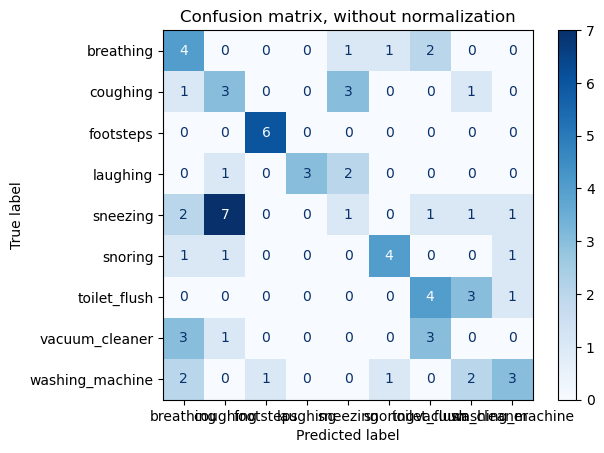

                 precision    recall  f1-score   support

      breathing       0.31      0.50      0.38         8
       coughing       0.23      0.38      0.29         8
      footsteps       0.86      1.00      0.92         6
       laughing       1.00      0.50      0.67         6
       sneezing       0.14      0.08      0.10        13
        snoring       0.67      0.57      0.62         7
   toilet_flush       0.40      0.50      0.44         8
 vacuum_cleaner       0.00      0.00      0.00         7
washing_machine       0.50      0.33      0.40         9

       accuracy                           0.39        72
      macro avg       0.46      0.43      0.42        72
   weighted avg       0.41      0.39      0.38        72



In [73]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]

for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        model,
        X_test,
        y_test,
        display_labels = sort_file_name.keys(),
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)
    break
plt.show()


acc_score = accuracy_score(y_test, predict_category)      

cm = confusion_matrix(y_test, predict_category)

cr = classification_report(y_test, predict_category)
print(cr)

# Apply SVM - kernel: rbf

In [ ]:
X = df_svm.iloc[:, :-1]          
y = df_svm.iloc[:, -1]            

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25)

# Train the SVM model
model = SVC(kernel='linear', C=1)
model.fit(X_train, y_train)

# Test the SVM model
predict_category = model.predict(X_test)
print("Accuracy: ",accuracy_score(y_test, predict_category))

# Validate the SVM model
accuracy_scores = cross_val_score(model, X_val, y_val, cv=5)

# Print the mean accuracy score and standard deviation of the scores
print("Mean Accuracy Score: %0.2f (+/- %0.2f)" % (accuracy_scores.mean(), accuracy_scores.std() * 2))

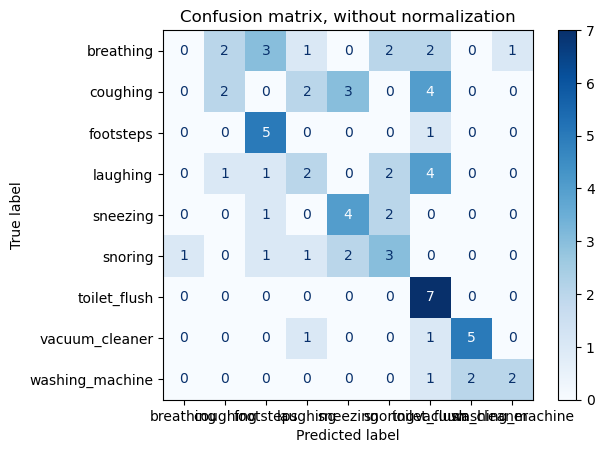

                 precision    recall  f1-score   support

      breathing       0.00      0.00      0.00        11
       coughing       0.40      0.18      0.25        11
      footsteps       0.45      0.83      0.59         6
       laughing       0.29      0.20      0.24        10
       sneezing       0.44      0.57      0.50         7
        snoring       0.33      0.38      0.35         8
   toilet_flush       0.35      1.00      0.52         7
 vacuum_cleaner       0.71      0.71      0.71         7
washing_machine       0.67      0.40      0.50         5

       accuracy                           0.42        72
      macro avg       0.41      0.48      0.41        72
   weighted avg       0.37      0.42      0.36        72



In [110]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]

for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        model,
        X_test,
        y_test,
        display_labels = sort_file_name.keys(),
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)
    break
plt.show()


acc_score = accuracy_score(y_test, predict_category)      

cm = confusion_matrix(y_test, predict_category)

cr = classification_report(y_test, predict_category)
print(cr)